## Anamoly Detection using Auto Encoders

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Load the Fashion MNIST train and test dataset, normalize and reshape to (28, 28,1)

In [3]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, _), (x_test, _) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

4423680/4422102 [==============================] - 0s 0us/step


## Create the Encoder and Decoder
- In the Encoder, you will compress the input data to its latent representation. The decoder will decompress the latent representation to recreate the input data.

## INPUT

In [ ]:
#pass the gray scale input image of size(28,28,1)
inputs = tf.keras.Input(shape=(28, 28, 1), name='input_layer')

## ENCODER

In [4]:

# Conv Block 1 -> BatchNorm->leaky Relu
encoded = tf.keras.layers.Conv2D(32, kernel_size=3, strides= 1, padding='same', name='conv_1')(inputs)
encoded = tf.keras.layers.BatchNormalization(name='batchnorm_1')(encoded)
encoded = tf.keras.layers.LeakyReLU(name='leaky_relu_1')(encoded)
# Conv Block 2 -> BatchNorm->leaky Relu
encoded = tf.keras.layers.Conv2D(64, kernel_size=3, strides= 2, padding='same', name='conv_2')(encoded)
encoded = tf.keras.layers.BatchNormalization(name='batchnorm_2')(encoded)
encoded = tf.keras.layers.LeakyReLU(name='leaky_relu_2')(encoded)
# Conv Block 3 -> BatchNorm->leaky Relu
encoded = tf.keras.layers.Conv2D(64, kernel_size=3, strides=2, padding='same', name='conv_3')(encoded)
encoded = tf.keras.layers.BatchNormalization(name='batchnorm_3')(encoded)
encoded = tf.keras.layers.LeakyReLU(name='leaky_relu_3')(encoded)

## DECODER

In [5]:
# DeConv Block 1-> BatchNorm->leaky Relu
decoded = tf.keras.layers.Conv2DTranspose(64, 3, strides= 1, padding='same',name='conv_transpose_1')(encoded)
decoded = tf.keras.layers.BatchNormalization(name='batchnorm_4')(decoded)
decoded = tf.keras.layers.LeakyReLU(name='leaky_relu_4')(decoded)
# DeConv Block 2-> BatchNorm->leaky Relu
decoded = tf.keras.layers.Conv2DTranspose(64, 3, strides= 2, padding='same', name='conv_transpose_2')(decoded)
decoded = tf.keras.layers.BatchNormalization(name='batchnorm_5')(decoded)
decoded = tf.keras.layers.LeakyReLU(name='leaky_relu_5')(decoded)
# DeConv Block 3-> BatchNorm->leaky Relu
decoded = tf.keras.layers.Conv2DTranspose(32, 3, 2, padding='same', name='conv_transpose_3')(decoded)
decoded = tf.keras.layers.BatchNormalization(name='batchnorm_6')(decoded)
decoded = tf.keras.layers.LeakyReLU(name='leaky_relu_6')(decoded)


## OUTPUT

In [ ]:
# output
outputs = tf.keras.layers.Conv2DTranspose(1, 3, 1,padding='same', activation='sigmoid', name='conv_transpose_4')(decoded)

## Define SSIM loss function
- SSIM measures Structural Similarity between two images in terms of luminance, contrast, and structure. A value of 1 for SSIM indicates identical images. You want the SSIM loss function to be a minimum when training the autoencoder on good images.

In [9]:
def SSIMLoss(y_true, y_pred):
  return 1 - tf.reduce_mean(tf.image.ssim(y_true, y_pred,1.0))

## Create the Autoencoder

In [10]:
autoencoder = tf.keras.Model(inputs, outputs)
optimizer = tf.keras.optimizers.Adam(lr = 0.0005)
autoencoder.compile(optimizer=optimizer, loss=SSIMLoss)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [12]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv_1 (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
batchnorm_1 (BatchNormalizat (None, 28, 28, 32)        128       
_________________________________________________________________
leaky_relu_1 (LeakyReLU)     (None, 28, 28, 32)        0         
_________________________________________________________________
conv_2 (Conv2D)              (None, 14, 14, 64)        18496     
_________________________________________________________________
batchnorm_2 (BatchNormalizat (None, 14, 14, 64)        256       
_________________________________________________________________
leaky_relu_2 (LeakyReLU)     (None, 14, 14, 64)        0     

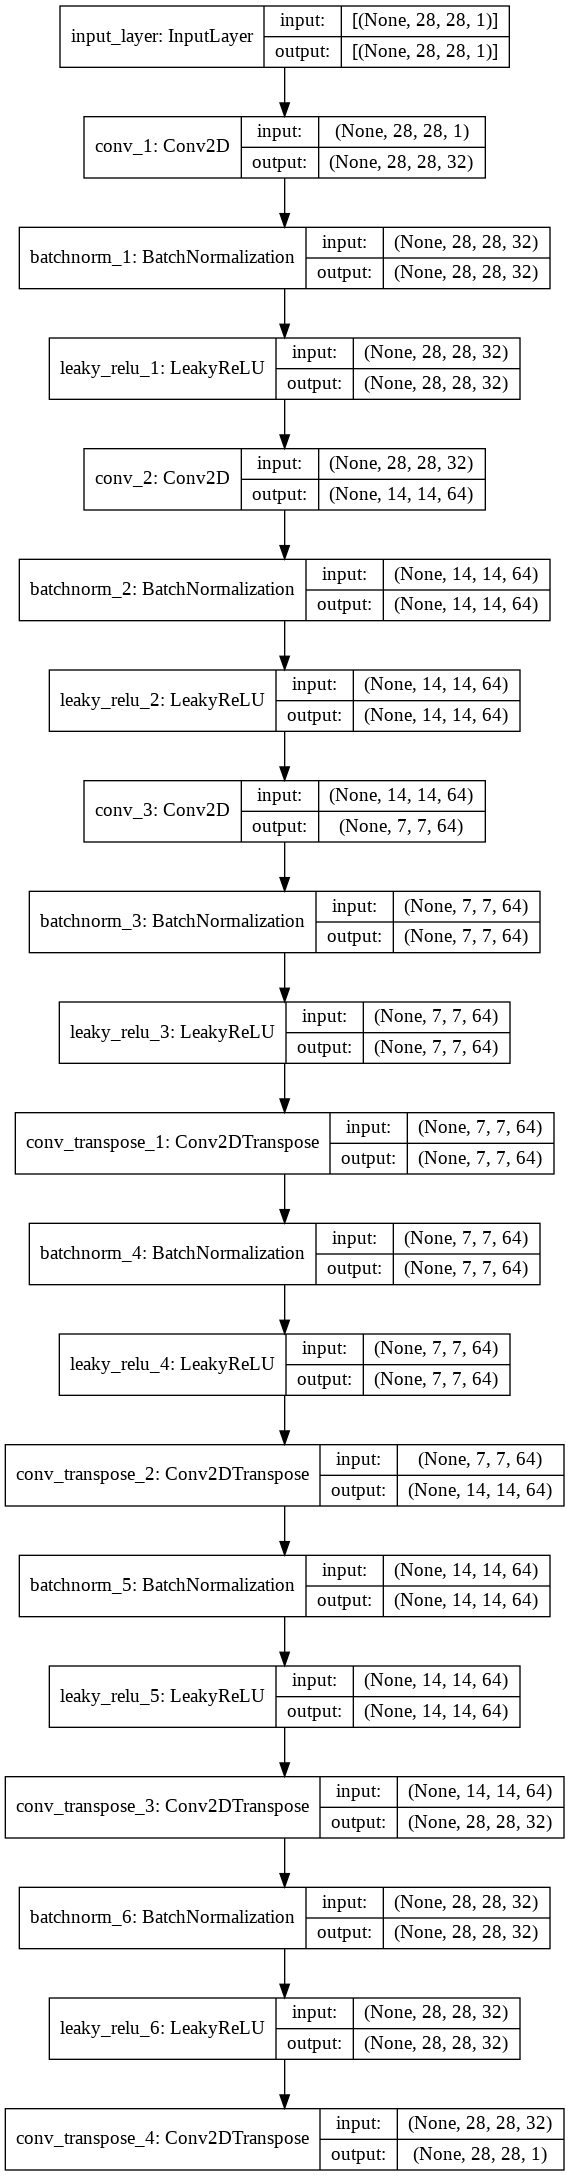

In [27]:
dot_img_file = '/tmp/autoencoder.png'
tf.keras.utils.plot_model(autoencoder, to_file=dot_img_file, show_shapes=True)

## Train the Autoencoder

In [13]:
hist=autoencoder.fit(x_train, x_train,
                epochs=10,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test)
                )

Epoch 1/10
469/469 [==============================] - 38s 16ms/step - loss: 0.0865 - val_loss: 0.2060
Epoch 2/10
469/469 [==============================] - 7s 14ms/step - loss: 0.0262 - val_loss: 0.0217
Epoch 3/10
469/469 [==============================] - 7s 14ms/step - loss: 0.0187 - val_loss: 0.0182
Epoch 4/10
469/469 [==============================] - 7s 14ms/step - loss: 0.0150 - val_loss: 0.0191
Epoch 5/10
469/469 [==============================] - 7s 14ms/step - loss: 0.0132 - val_loss: 0.0125
Epoch 6/10
469/469 [==============================] - 7s 14ms/step - loss: 0.0119 - val_loss: 0.0139
Epoch 7/10
469/469 [==============================] - 7s 14ms/step - loss: 0.0108 - val_loss: 0.0098
Epoch 8/10
469/469 [==============================] - 7s 14ms/step - loss: 0.0098 - val_loss: 0.0118
Epoch 9/10
469/469 [==============================] - 7s 14ms/step - loss: 0.0090 - val_loss: 0.0084
Epoch 10/10
469/469 [==============================] - 7s 14ms/step - loss: 0.0087 - val_l

## Reconstruct the Fashion MNIST images for the test data and visualize
- Pass the test dataset to the autoencoder and predict the reconstructed data. Visualize the original and the reconstructed images

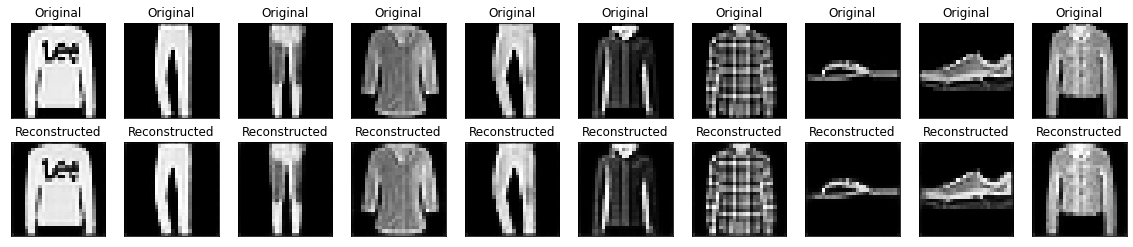

In [26]:
decoded_imgs = autoencoder.predict(x_test)
n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    plt.title("Original")
    ax.get_yaxis().set_visible(False)
    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.title("Reconstructed")
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

- Finally, comparing the original data that the autoencoder was trained on, the reconstructed image of trained data, and prediction on the anomalous image using autoencoder.

In [24]:
mnist = tf.keras.datasets.mnist
(x_mnisttrain, _), (x_mnisttest, _) = mnist.load_data()
x_mnisttrain = x_mnisttrain.astype('float32') / 255.
x_mnisttest = x_mnisttest.astype('float32') / 255.
x_mnisttrain = np.reshape(x_mnisttrain, (len(x_mnisttrain), 28, 28, 1))
x_mnisttest = np.reshape(x_mnisttest, (len(x_mnisttest), 28, 28, 1))

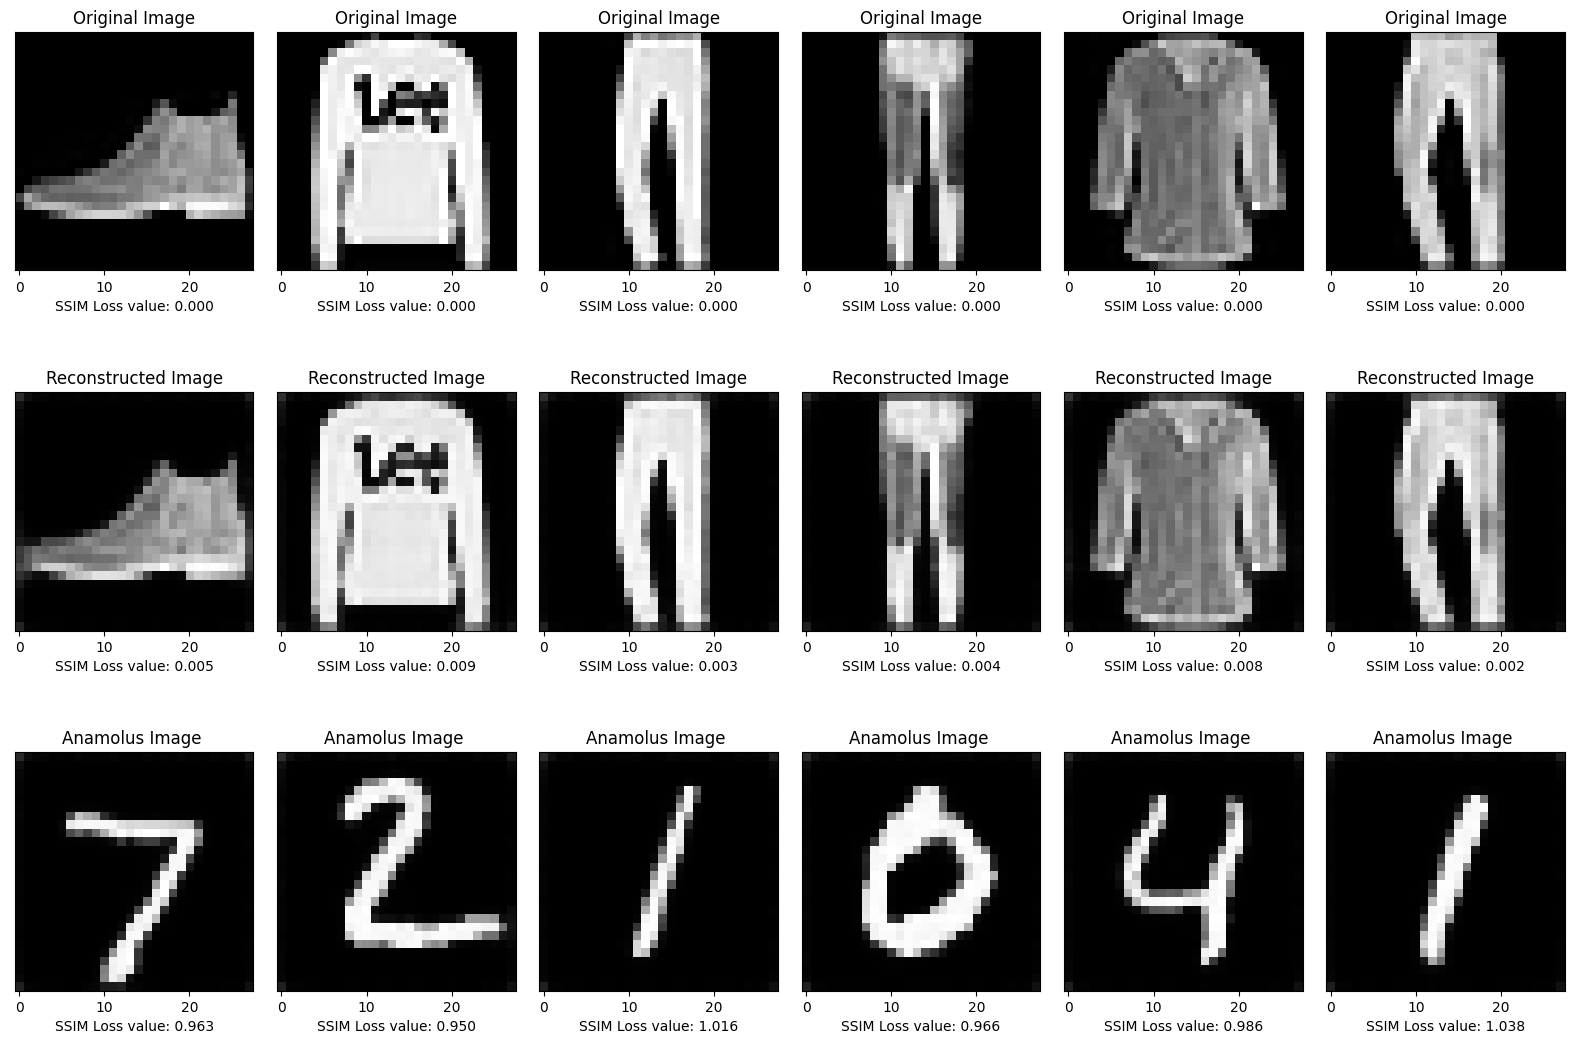

In [20]:
%matplotlib inline
n = 6  # how many encoded and decoded images we will display
decoded_imgs= autoencoder.predict(x_test)
decoded_mnistimgs= autoencoder.predict(x_mnisttest)
plt.figure(figsize=(20, 14), dpi=100)
plt.subplots_adjust( wspace=0.1, hspace=0.07)
plt_a=1
for i in range(n):
    # Original training dataset vs Original training
    ax = plt.subplot(3, n, plt_a   )
    plt.imshow(x_test[i].reshape(28,28))
    ax.get_xaxis().set_visible(True)
    ax.get_yaxis().set_visible(False)
    value_a = SSIMLoss(x_test[i], x_test[i])
    ax.set_title("Original Image")
    label = 'SSIM Loss value: {:.3f}'
    ax.set_xlabel(label.format(value_a) )
    
    # Reconstructed good data  vs Original training data
    ax = plt.subplot(3, n, plt_a + n )
    plt.imshow(decoded_imgs[i].reshape(28,28))
    ax.get_xaxis().set_visible(True)
    ax.get_yaxis().set_visible(False)    
    value_a = SSIMLoss(decoded_imgs[i], x_test[i])
    ax.set_title("Reconstructed Image")
    label = 'SSIM Loss value: {:.3f}'
    ax.set_xlabel(label.format(value_a) )
    
    # Reconstructed anomalous data  vs Original training data
    ax = plt.subplot(3, n, plt_a + 2*n)
    plt.imshow(decoded_mnistimgs[i].reshape(28,28))
    ax.get_xaxis().set_visible(True)
    ax.get_yaxis().set_visible(False)
    value = SSIMLoss(decoded_mnistimgs[i], decoded_imgs[i])
    label = 'SSIM Loss value: {:.3f}'
    ax.set_title("Anamolus Image " )
    ax.set_xlabel(label.format(value) )
    plt_a+=1
plt.show()

### You can see from the above image that the SSIM loss is minimal for the reconstruction of the trained dataset however the SSIM loss is higher for the dataset the autoencoder was not trained on.


## Conclusion:
- Autoencoder works good for identifying anomaly with the grayscale MNIST and Fashion MNIST.